<h1 style="color: blue;">나. 이미지 전처리</h1>

머신러닝 분야에서 가장 활발하게 연구 되고 있는 분야는 아무래도 컴퓨터 비전(computer vision)분야

최근 컨볼루션 네트워크 모델들은 feature extraction 능력이 매우 뛰어나서 이미지에 추가적인 전처리 작업을 하지 않더라도 뛰어난 성능을 내고 있다.

하지만 그렇더라도 더 효과적인 모델을 위해서는 적용하고자 하는 목적에 맞게 이미지 전처리 작업을 거 쳐야 하는 경우가 있다.

<h2 style="color: green;">PIL(Python Imaging Library)</h2>

PIL은 Python에서 사용되는 이미지 처리 라이브러리로, 이미지를 불러오고 저장하는 등의 기본적인 이미지 처리 기능을 제공합니다. PIL은 간단하고 직관적인 API를 가지고 있으며, Python 기본 라이브러리인 io와 함께 사용하면 메모리에 이미지를 로드하지 않고도 이미지를 처리할 수 있습니다.

<h2 style="color: green;">OpenCV(Open Source Computer Vision)</h2>

OpenCV는 이미지 처리 및 컴퓨터 비전 작업을 위한 라이브러리로, 다양한 이미지 프로세싱 기능과 컴 퓨터 비전 알고리즘을 제공합니다. OpenCV는 C++로 작성된 라이브러리이지만 Python과 같은 다른 언어에서도 사용할 수 있습니다. OpenCV는 영상 처리, 객체 검출, 추적, 분할, 인식, 3D 재구성 등 다양한 작업에 사용됩니다.

In [1]:
pip install opencv-python==4.5.5.64

Note: you may need to restart the kernel to use updated packages.


In [15]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

## *이미지 저장*

OpenCV의 imwrite() 메소드를 사용하여 이미지를 저장할 수 있다. imwrite( 저장경로 , 저장하고자 하는 이미지)

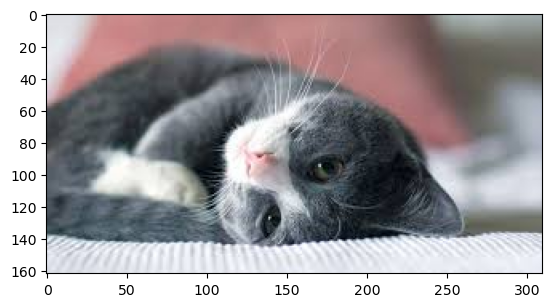

In [4]:
img = cv2.imread("../data/cat.png")

#색상의 문제 발생 -> BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

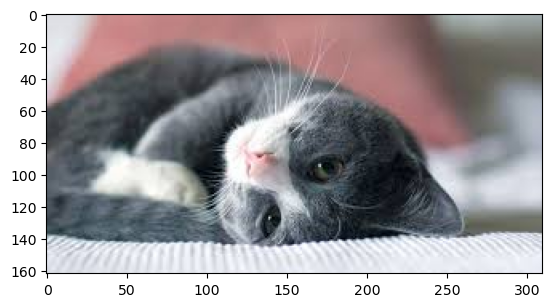

In [8]:
np.save("../data/image.npy", img)

img_data = np.load("../data/image.npy")

plt.imshow(img_data)
plt.show()

## *이미지 확인하기*

주피터 노트북에서는 cv2.imshow() 함수를 직접 사용할 수 없습니다. 이는 주피터 노트북이 터미 널 환경에서 실행되지 않습니다.

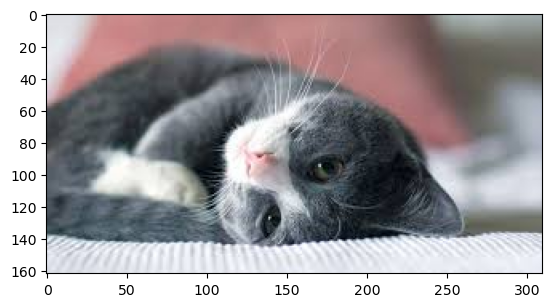

In [12]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

## *이미지 타입, 크기 확인 방법*

In [13]:
image_path = "../data/cat.png"

#image read
image = cv2.imread(image_path)

#image 타입
image_type = type(image)
print("이미지 타입 >> ", image_type)

#이미지 크기 확인
image_height, image_width, image_channel = image.shape
print(image_height, image_width, image_channel)

이미지 타입 >>  <class 'numpy.ndarray'>
162 310 3


## *Numpy를 사용하여 이미지 저장 시 효율 비교*

In [33]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [34]:
from PIL import Image

In [35]:
# 이미지 불러오기
img = Image.open("../data/cat.png").convert('L') #그레이 스케일 변환
print(img)

<PIL.Image.Image image mode=L size=310x162 at 0x144493F40>


In [36]:
img_array = np.array(img)
print(img_array)

[[222 222 222 ... 169 169 169]
 [223 223 223 ... 168 168 168]
 [223 223 223 ... 165 165 165]
 ...
 [219 219 222 ... 235 234 234]
 [221 222 224 ... 236 236 235]
 [221 222 224 ... 236 236 235]]


In [37]:
np.save("../data/pil_image.npy", img_array)

In [38]:
img_array1 = np.load("../data/pil_image.npy")

print(img_array1)

[[222 222 222 ... 169 169 169]
 [223 223 223 ... 168 168 168]
 [223 223 223 ... 165 165 165]
 ...
 [219 219 222 ... 235 234 234]
 [221 222 224 ... 236 236 235]
 [221 222 224 ... 236 236 235]]


In [39]:
# 다시 PIL 이미지로 변환
img = Image.fromarray(np.uint8(img_array1))
img.save('../data/pil_image_numpy.png')

In [40]:
np_save_size = os.path.getsize("../data/pil_image.npy")
pil_save_size = os.path.getsize("../data/pil_image_numpy.png")

print(np_save_size, "bytes")
print(pil_save_size, "bytes")

50348 bytes
26808 bytes


## *이미지 크기 변경*

OpenCV의 resize() 메소드를 이용하여 이미지 크기 변경이 가능하다.

244 244


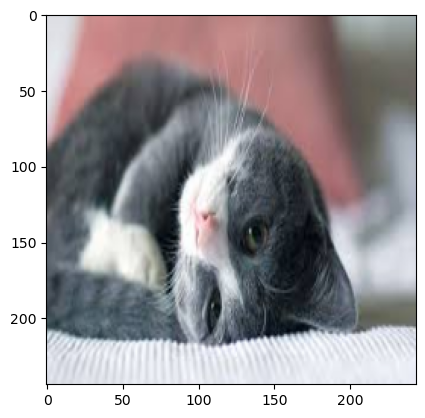

In [11]:
#이미지 크기 조절
image_resize = cv2.resize(image, (244,244))

#이미지 크기 확인
image_height, image_width, _ = image_resize.shape

print(image_height, image_width)
image_resize = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)

#변경된 이미지
plt.imshow(image_resize)
plt.show()

## *이미지 크롭 - [start : end : stop]*

이미지를 자르고 싶을 경우 배열 슬라이싱을 이용하여 원하는 부분만 crop할 수 있다.

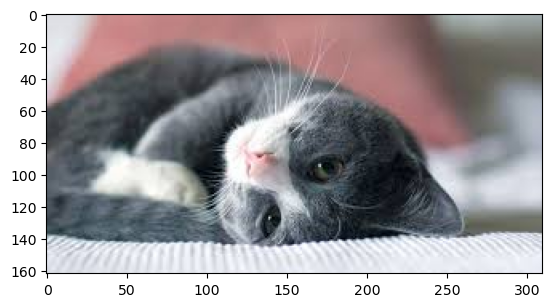

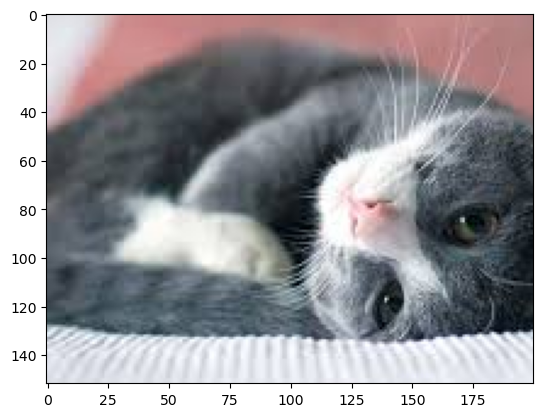

In [43]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 높이는 처음부터(위) 10위치부터 끝까지 / 너비는 처음부터(왼쪽) 200픽셀까지
image_cropped = image[10:,:200]

plt.imshow(image)
plt.show()

plt.imshow(image_cropped)
plt.show()

## *이미지 크롭 - 좌표*

In [45]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

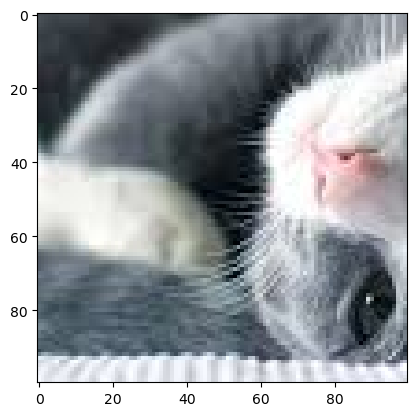

In [46]:
x1, y1 = 50, 50 #좌픅 상단 모서리 좌표
x2, y2 = 150, 150  #우측 하단 모서리 좌표

cropped_image_test = image[y1:y2, x1:x2]
plt.imshow(cropped_image_test)
plt.show()

## *이미지 크롭 - 실습*

In [16]:
#os listdir
import os

#glob listdir
import glob
from natsort import natsort

In [17]:
#정사각형 resize 함수
def resize_img(pil_img, background_color):
    width, height = pil_img.shape[1], pil_img.shape[0]
    
    # 정사각형
    if width == height:
        return pil_img
    
    # 너비가 높이보다 큰 경우
    elif width > height:
        pil_img = Image.fromarray(pil_img)
        #cv2로 읽은 이미지는 numpy 형태
        #이것을 PIL형태로 변환해주어야한다 -> pil_img.mode 같은 함수 활용하기 위해서
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    
    # 높이가 너비보다 큰 경우
    else:
        pil_img = Image.fromarray(pil_img)
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [18]:
img_list = glob.glob(os.path.join("../data/banana_img_download/", "*.png"))
img_list_sort = natsort.natsorted(glob.glob(os.path.join("../data/banana_img_download/", "*.png")))
#natsort()는 원본 리스트를 변경하고 natsorted()는 정렬된 새로운 리스트를 반환

#print(file_list_sort)

for i in img_list_sort :
    image = cv2.imread(i)
    #print(image)
    #색상의 문제 발생 BGR -> RGB 컨버터 필요
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_square = resize_img(image, (0,0,0))
#     plt.imshow(image_square)
#     plt.show()

## *이미지 Blur 처리*

이미지를 흐리게 하기 위해서는 각 픽셀을 주변 픽셀의 평균값으로 변환하면 되며, 이렇게 주변 픽셀에 수행되는 연산을 커널(kernel)이라고 한다. 커널이 클수록 이미지가 더 부드러워지게 된다.

In [48]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

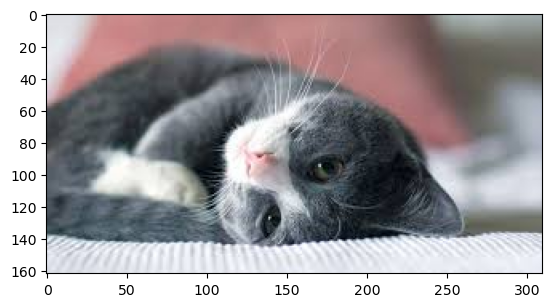

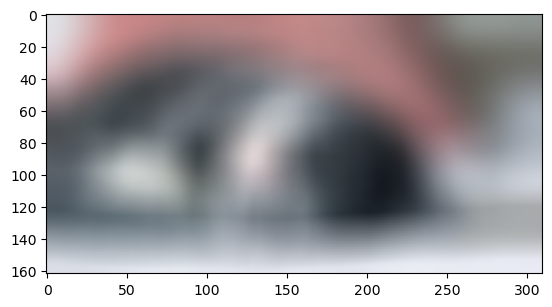

In [49]:
image_blurry = cv2.blur(image, (33,33))
#(커널 블러 처리 수치)

plt.imshow(image)
plt.show()

plt.imshow(image_blurry)
plt.show()

## *커스텀 커널을 정의 후 filter2D() 메소드 사용*

커널을 직접 정의한 후 filter2D() 메소드를 통해 이미지에 적용하는 것도 가능하다.
생성된 커널을 이미지에 적용 시 중앙 원소가 변환되는 픽셀이며, 나머지는 그 픽셀의 이웃이 된다.

In [52]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [53]:
kernel = np.ones((10, 10))/80  #모두 더하면 1이 되도록 정규화
#커널의 요소들을 합하여 1이 되도록 정규화하는 과정에서 80으로 나누는 것입니다. 
#80은 여기서 임의의 값으로 설정된 것이며, 사용자가 원하는 값으로 조정할 수 있습니다. 
#커널의 크기가 10x10이므로 총 요소 개수는 100개입니다. 따라서 100으로 나누는 것이 아니라, 요소들의 합을 80으로 만들기 위해 80으로 나누는 것입니다.
print(kernel)

[[0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]]


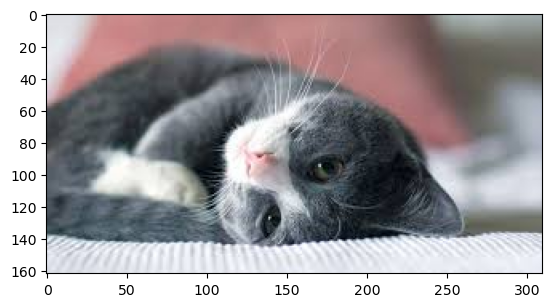

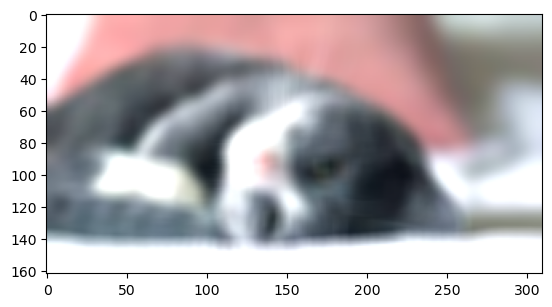

In [54]:
image_kernel = cv2.filter2D(image, -1, kernel)
#(이미지, 깊이, 사전에 설정한 커널 수치)

plt.imshow(image)
plt.show()

plt.imshow(image_kernel)
plt.show()

## *가우시안 블러*

In [15]:
image_path = "./data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

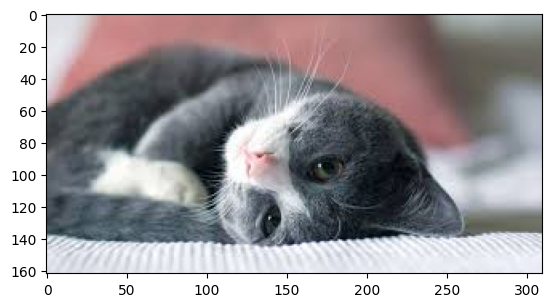

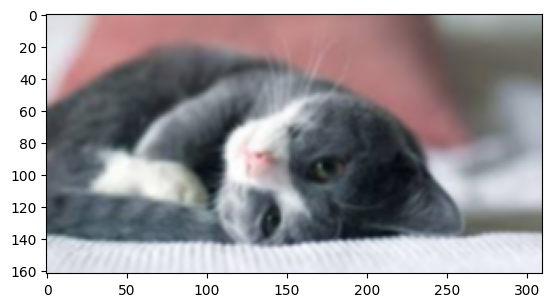

In [16]:
#가우시안 블러 처리
image_g = cv2.GaussianBlur(image, (5,5), 0)
#(이미지, 커널의 크기, 표준편차)

plt.imshow(image)
plt.show()

plt.imshow(image_g)
plt.show()

## *이미지 선명하게 표현*

대상 픽셀을 강조하는 커널을 정의한 후 filter2D() 메소드를 사용하여 이미지에 적용한다.

In [57]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

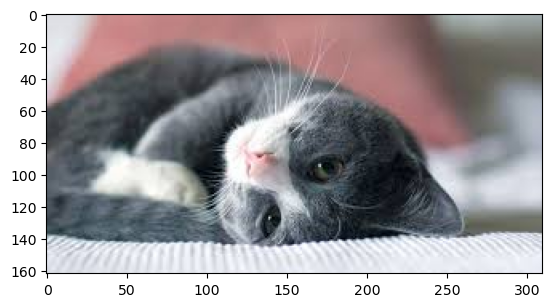

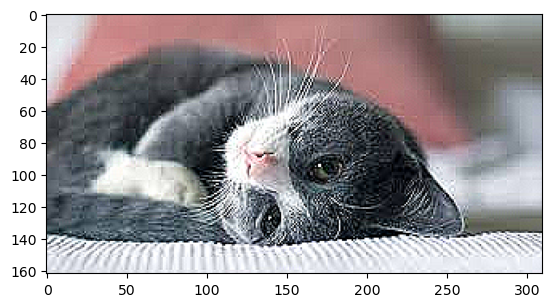

In [58]:
kernel_ = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]
                   ])

image_sharp = cv2.filter2D(image, -1, kernel_)

plt.imshow(image)
plt.show()

plt.imshow(image_sharp)
plt.show()

## *이미지 대비 높이기 - 히스토그램 평활화*

히스토그램 평활화(Histogram Equalization)은 객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구 이며, OpenCV에서는 equalizeHist() 메소드를 통해 적용할 수 있다.

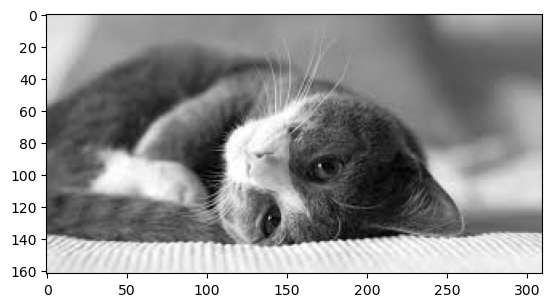

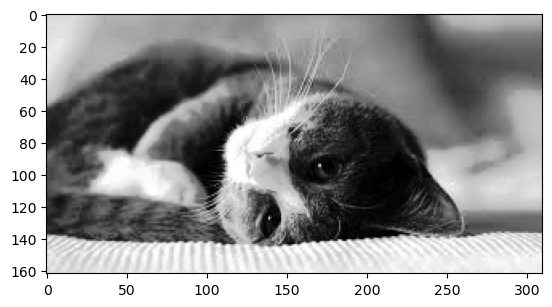

In [59]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#단일 이미지에서만 적용가능
image_enchanced = cv2.equalizeHist(image_gray)

plt.imshow(image_gray, 'gray')
plt.show()

plt.imshow(image_enchanced, 'gray')
plt.show()

컬러 이미지의 경우 먼저 YUV 컬러 포맷으로 변환해야 한다. Y는 루마 또는 밝기이고 U와 V는 컬러를 나타낸다. 
변환한 뒤에 위와 동일하게 equlizeHist() 메소드를 적용하고 다시 RGB 포맷으로 변환 후 출력한다.

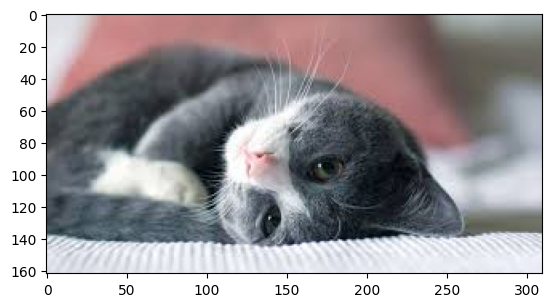

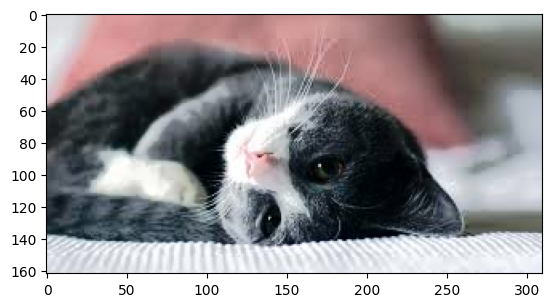

In [20]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)

#RGB 타입으로 변경
image_org = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#YUV 컬러 변경
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

#히스토그램 평활화 적용
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

#YUV -> RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

#시각화
plt.imshow(image_org)
plt.show()

plt.imshow(image_rgb)
plt.show()

## *이미지 이진화*

이미지 이진화(임계처리)는 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정이다.

더 고급 기술은 적응적 이진화(Adaptive Thresholding)로, 픽셀의 임곗값이 주변 픽셀의 강도에 의해 결정된다. 이는 이미지 안의 영역마다 빛 조건이 달라질 때 도움이 된다.

**adaptiveThreshold() 함수에는 네 개의 중요한 매개변수가 있다.**

+ max_output_value : 출력 픽셀 강도의 최댓값 저장
+ cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 픽셀의 임곗값을 주변 픽셀 강도의 가중치 합으로 설정. 가중치는 가우시안 윈도우에 의해 결정
+ cv2.ADAPTIVE_THRESH_MEAN_C : 주변 픽셀의 평균을 임곗값으로 설정

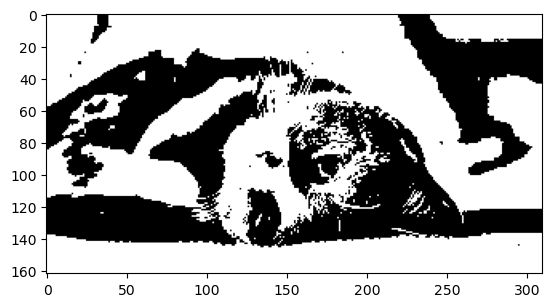

In [60]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#이미지 이진화
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(
                                    image_gray,
                                    max_output_value,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, #cv2.THRESH_INV는 반전
                                    neighborhood_size,
                                    subtract_from_mean
)

plt.imshow(image_binarized, 'gray')
plt.show()

## *이미지 회전*

rotate(이미지, 각도) : rotate 함수의 첫번째 매개변수에는 회전시킬 이미지를, 두번째 매개변수에는 회전 각도를 입력해주면 됩니다.

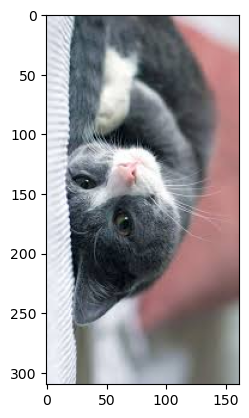

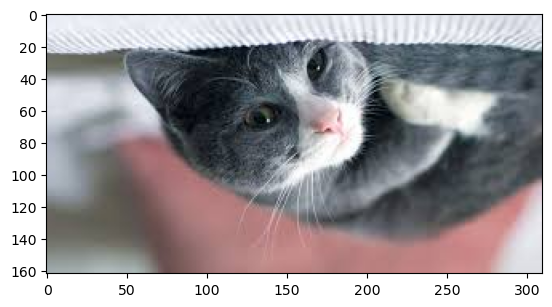

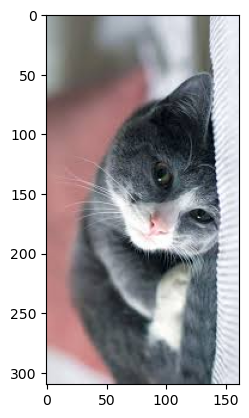

In [62]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#이미지 회전
image_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
image_180 = cv2.rotate(image, cv2.ROTATE_180)
image_270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(image_90)
plt.show()

plt.imshow(image_180)
plt.show()

plt.imshow(image_270)
plt.show()

## *이미지 좌우 및 상하 반전*

Flip(이미지, key) : key 1은 좌우 0은 상하

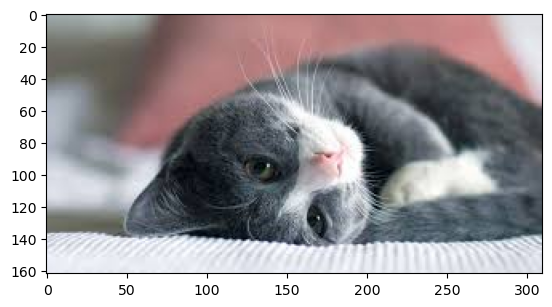

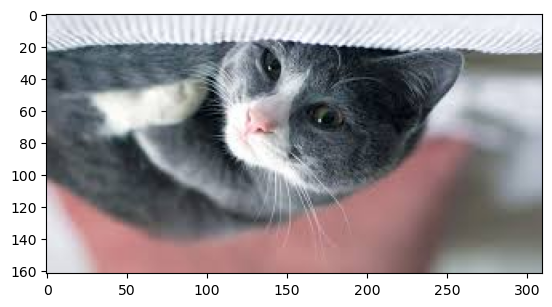

In [63]:
image_path = "../data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#1은 좌우반전, 0번은 상하 반전
dat_1 = cv2.flip(image, 1)
dat_2 = cv2.flip(image, 0)

plt.imshow(dat_1)
plt.show()

plt.imshow(dat_2)
plt.show()

## *배경 제거*

배경을 제거하고자 하는 전경 주위에 사각형 박스를 그리고 그랩컷(grabCut) 알고리즘을 적용하여 배경을 제거한다.

grabCut의 경우 잘 작동하더라도 여전히 이미지에 제거하지 못한 배경이 발생할 수 있다.

이렇게 제거되지 못한 부분은 다시 적용하여 제거 할 수있지만 실전에서 수천장의 이미지를 수동으로 고 치는 것은 불가능한 일이므로 머신러닝을 적용한다거나 할 때도 일부러 noise를 적용하는 것처럼 일부 배경이 남아있는 것을 수용하는 것이 좋다.

(288, 420, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


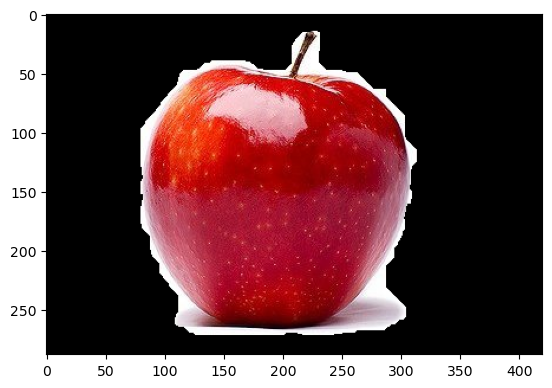

In [124]:
#배경 제거
image_path = "../data/apple.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

rectangle = (0, 0, 315, 420)  #시작지점 xy 넓이 너비

#초기 마스크 생성
mask = np.zeros(image.shape[:2], np.uint8)
print(mask)

#grabCut에 사용할 임시 배열 생성
bgModel = np.zeros((1,65), np.float64)
fgModel = np.zeros((1,65), np.float64)

#grabCut 실행
cv2.grabCut(image, mask, rectangle, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
"""
np.where((mask==2) | (mask==0), 0, 1): 이 부분은 mask 배열에서 값을 선택하고, 
선택한 조건을 만족하는 경우에는 0으로, 그렇지 않은 경우에는 1로 설정합니다. 

이 때 조건은 (mask==2) | (mask==0)로, mask의 값이 2(배경 가능성) 또는 0(배경)인 경우에 해당합니다.
.astype('uint8'): 이 부분은 조건에 따라 선택된 값을 0 또는 1로 설정하고 나면 데이터 타입을 uint8로 변환합니다.
"""

image_rgb_nobg = image * mask2[:,:, np.newaxis]

plt.imshow(image_rgb_nobg)
plt.show()

## *경계선 감지*

Canny() 메소드를 활용하여 경계선을 감지할 수 있다. Canny() 메소드는 그래디언트 임곗값 사이의 저점과 고점을 나타내는 두 매개변수를 필요로 하며, 낮은 임곗값과 높은 임곗값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주하고, 높은 임곗값보다 큰 픽셀은 강한 경계선 픽셀로 간주한다.

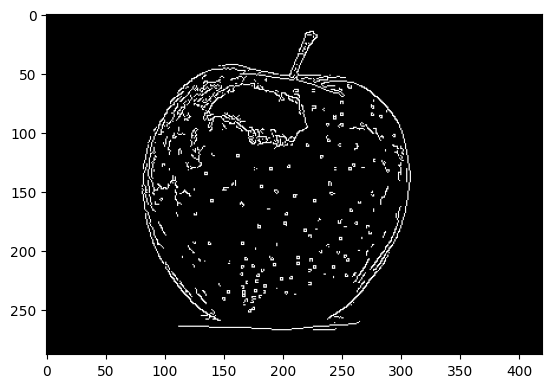

In [25]:
image_path = "../data/apple.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#1. 픽셀 강도의 중간값을 계산
median_intensity = np.median(image)

# 2. 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정
lower_threshold = int(max(0, (1.0 - 0.44) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 0과의 최댓값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 하한값으로 설정합니다. 
# 하한값은 0 미만으로 설정되지 않도록 하기 위한 것입니다.
upper_threshold = int(min(255, (1.0 + 0.44) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 255과의 최소값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 상한값으로 설정합니다. 
# 상한값은 255 초과 x


#3. Canny edge 적용
image_canny = cv2.Canny(image, lower_threshold, upper_threshold)

plt.imshow(image_canny, 'gray')
plt.show()

## *모서리 감지*

+ cornerHarris-해리스 모서리 감지의 OpenCV 구현
+ 해리스 모서리 감지기는 두 개의 경계선이 교차하는 지점을 감지하는 방법으로 사용됩니다.
+ 모서리는 정보가 많은 포인트입니다.
+ 해리스 모서리 감지기는 윈도(이웃, 패치)안의 픽셀이 작은 움직임에도 크게 변하는 윈도를 찾습니다. 
+ cornerHarris 매개변수 block_size: 각 픽셀에서 모서리 감지에 사용되는 이웃 픽셀 크기
+ cornerHarris 매개변수 aperture: 사용하는 소벨 커널 크기

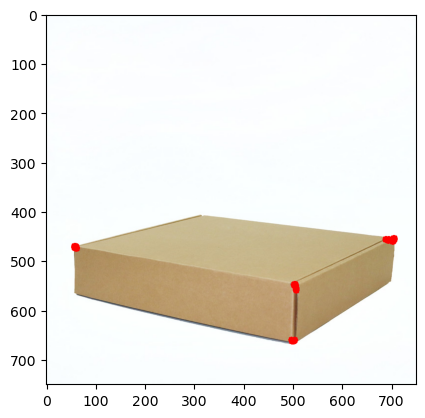

In [117]:
image = cv2.imread("../data/box_image.png")

# 모서리 찾기 
image_gray = cv2.imread("../data/box_image.png", cv2.IMREAD_GRAYSCALE)
image_gray = np.float32(image_gray)

# 모서리 감지 매개변수 설정 
block_size = 4 
aperture = 29
free_parameter = 0.04

detetor_respones = cv2.cornerHarris(
    image_gray,
    block_size,
    aperture,
    free_parameter
) # 모서리 감지

detetor_respones = cv2.dilate(detetor_respones, None) # 모서리 표시를 부각 시키기 위한 함수 


# 임계값 보다 큰 감지 결과만 남기고 나머지는 버리는 형태 
threahold = 0.01
for i in range(detetor_respones.shape[0]) :
    for j in range(detetor_respones.shape[1]):
        if detetor_respones[i, j] > threahold * detetor_respones.max() :
            # print(threahold * detetor_respones.max())
            cv2.circle(image, [j, i], radius=5, color=(0,0,255), thickness=-1)
            
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

## *머신러닝 특성 만들기*

+ 이미지를 머신러닝에 필요한 샘플로 변환하려면 넘파이의 flatten()을 사용합니다.
+ Flatten()은 이미지 데이터가 담긴 다차원 배열을 샘플값이 담긴 벡터로 변환
+ 이미지가 흑백일 때 각 픽셀은 하나의 값으로 표현됩니다.
+ 컬럼 이미지라면 각 픽셀이 하나의 값이 아니라 여러 개의 값으로 표현됩니다.
+ 이미지의 모든 픽셀이 특성이 되기 때문에 이미지가 커질수록 특성의 개수도 크게 늘어납니다

[[253 253 253 253 253 252 253 253 254 253]
 [254 254 254 254 253 254 254 254 253 254]
 [254 254 254 254 253 253 254 254 254 254]
 [254 253 253 253 253 253 254 254 254 254]
 [253 253 253 253 253 254 253 254 253 253]
 [254 253 254 254 186 253 253 254 254 254]
 [254 148 184 182 183 182 182 178 179 254]
 [253 152 158 156 162 169 162 154 146 254]
 [254 254 254 254 255 156 161 254 254 254]
 [253 253 253 253 253 253 254 253 253 253]]


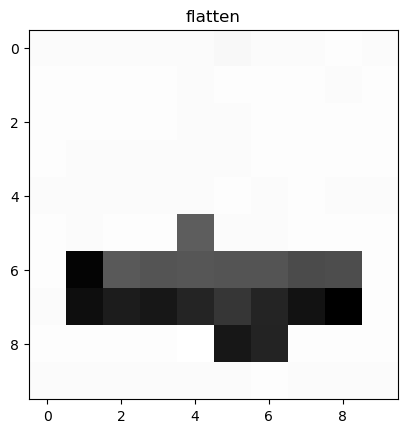

In [17]:
image_path = "../data/box_image.png"
image = cv2.imread(image_path)
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_10x10 = cv2.resize(image_gray, (10,10))  #image 10x10 픽셀 크기로 변환
image_10x10.flatten()  #이미지 데이터를 1차원 벡터로 변환
print(image_10x10)

plt.imshow(image_10x10, 'gray')
plt.title('flatten')
plt.show()

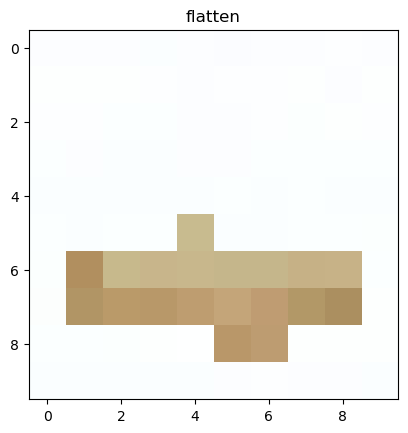

In [125]:
image_path = "../data/box_image.png"
image = cv2.imread(image_path)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_10x10 = cv2.resize(image_color, (10,10))  #image 10x10 픽셀 크기로 변환
image_10x10.flatten()  #이미지 데이터를 1차원 벡터로 변환

plt.imshow(image_10x10, 'gray')
plt.title('flatten')
plt.show()